In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
car_data = pd.read_csv("/content/Dataset.csv")

In [ ]:
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
target = 'price'

In [ ]:
label_encoder = LabelEncoder()
for feature in ['model', 'transmission', 'fuelType']:
    car_data[feature] = label_encoder.fit_transform(car_data[feature])

In [ ]:
X = car_data[features]
y = car_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the KNN model
k = 5  # Choose the value of K
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

In [ ]:
# Predict the car prices for the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 5921.410715899154


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.5799828250100799


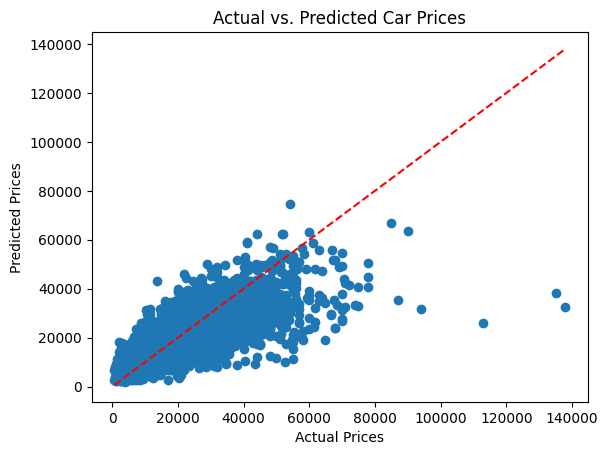

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.show()